


# Linear Regression with Python

Linear regression is a Supervised machine Learning problem and is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

Assumptions of Linear Regression:


1.   Linearity - Relationship between dependant and independant variables must be Linear
2.   Homoscedasticity - The variance of residual is the same for any value of independant variable
3.   Independance - Observations are independant of each other
4.   Normality - For any kind of independant variable, dependant variable is normally distributed



Based on the hypothesis chosen for building the relationship between dependant and independant variables, Linear regression can be classified as following types:


*   Simple Linear Regression - Only one independant and dependant variable
*   Multiple Linear Regression - Multiple independant and one dependant variable
*   Polynomial Regression - Independant variable models as higher degree polynomial

Mathmatically, they can be represented as below:



Simple Linear Regression: $$ y = \theta_0 + \theta_1 x $$

Multiple Linear Regression: $$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 +...+\theta_n x_n  $$

Polynomial Linear Regression: $$ y = \theta_0 + \theta_1 x_1^2 + \theta_2 x_1^2 +...+\theta_n x_1^n  $$






# Simple Linear Regression

We will deep dive into Simple Linear regression as it helps build a strong intuition on how Linear Regression works.

Hypothesis: $$y' = \theta_0 + \theta_1 x $$


Hypothesis of Simple Linear Regression is basically equation of a straight line with slope of $\theta$$_1$ and intercept of $\theta$$_0$. By varying the slope and intercept, any linear relationship between two variables can be determined.

In the following graph, data is represented as green dots. As it can be inferred, when value of $\theta$$_1$ is 1 and $\theta$$_0$ is 1, trend line matches the data trend

![alt text](https://drive.google.com/uc?export=view&id=16a75p6AwrF6ZeeD-mYSWppQpX-M7vW5W)

When there are more variables involved, it becomes impossible for human mind to understand the trend. So, we need a mathmatical way to represent the error in estimation. Cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y

![alt text](https://drive.google.com/uc?export=view&id=1ZuxUNExH52XLLf5TPmPJP3UDMzj4QA2Y)

A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. Error can be found as Absolute error, Mean Absolute error, Squared Mean Error etc.

Most commonly used cost function for Linear regression is represented below:

Cost Function: $$ J(\theta_1,\theta_2) = \frac1 {2m} * \sum_{i=1}^{m} (y_i'-y_i)^2  $$

And our goal is to minmize this cost function by updating values of $\theta$$_1$ and $\theta$$_0$.

Goal: $$ minimize - J(\theta_0 , \theta_1) $$

## Gradient descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient of the function at the current point.



Gradient Descent: $$ \theta_j : = \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} \left( J(\theta_0, \theta_1) \right)   $$

# Linear Regression- From Scratch

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Create Data

In [3]:
X = [1, 2, 3, 4]
Y = [2, 4, 6, 8]

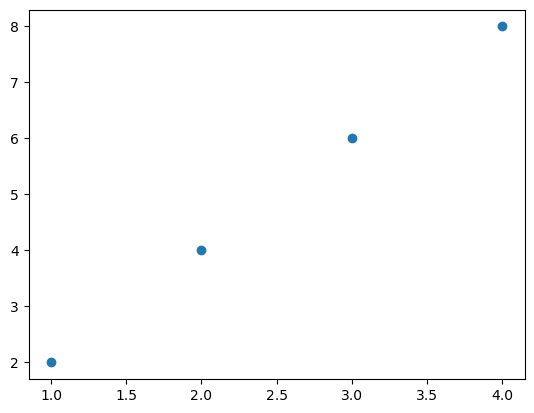

In [4]:
plt.scatter(X,Y)


# Initialize hyper parameters

In [5]:
# notice small alpha value
alpha = 0.0001
iters = 600

# theta is a row vector
theta = np.array([[3, 3, 3, 3]])

# Define Cost Function

Cost Function: $$ J(\theta_1,\theta_2) = \frac1 {2m} * \sum_{i=1}^{m} (y_i'-y_i)^2  $$

In [7]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2) # @ means matrix multiplication of arrays. If we want to use * for multiplication we will have to convert all arrays to matrices
    return np.sum(inner) / (2 * len(X))

In [10]:
computeCost(X , Y, theta)

315.0

# Define Gradient Descent

Gradient Descent: $$ \theta_j : = \theta_j - \alpha \frac{\mathrm \partial}{\mathrm \partial \theta_j} \left( J(\theta_0, \theta_1) \right)   $$

In [12]:
def gradientDescent(X, Y, theta, alpha, iters):
    for i in range(iters):
        cost = computeCost(X, Y, theta)
        theta = theta - (alpha/len(X)) * np.sum((X @ theta.T - Y), axis=0)
        
        if i % 50 == 0: # just look at cost every ten loops for debugging
            print(cost)
            print(theta)
            print((alpha/len(X)) * np.sum((X @ theta.T - Y), axis=0))

    return (theta, cost)

# Run the algorithm

In [13]:
# notice small alpha value
alpha = 0.0001
iters = 650

# theta is a row vector
theta = np.array([[3, 3, 3, 3]])
g, cost = gradientDescent(X, Y, theta, alpha, iters)  
print(g, cost)

315.0
[[2.9975 2.9975 2.9975 2.9975]]
0.0024975
285.247545973034
[[2.87563606 2.87563606 2.87563606 2.87563606]]
0.002375636056422086
258.32775921207366
[[2.75971839 2.75971839 2.75971839 2.75971839]]
0.0022597183874164886
233.97094754878103
[[2.64945685 2.64945685 2.64945685 2.64945685]]
0.0021494568482508833
211.93309562710638
[[2.54457545 2.54457545 2.54457545 2.54457545]]
0.002044575451622893
191.9934202691202
[[2.44481168 2.44481168 2.44481168 2.44481168]]
0.0019448116768571823
173.95215858921776
[[2.34991581 2.34991581 2.34991581 2.34991581]]
0.0018499158128098586
157.6285666972186
[[2.25965033 2.25965033 2.25965033 2.25965033]]
0.001759650332835424
142.85910894064855
[[2.1737893 2.1737893 2.1737893 2.1737893]]
0.0016737893002518342
129.49581954537643
[[2.0921178 2.0921178 2.0921178 2.0921178]]
0.0015921178028155156
117.40482024092643
[[2.01443141 2.01443141 2.01443141 2.01443141]]
0.0015144314147908105
106.46497901950252
[[1.94053569 1.94053569 1.94053569 1.94053569]]
0.00144053

In [14]:
g


array([[1.80469007, 1.80469007, 1.80469007, 1.80469007]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


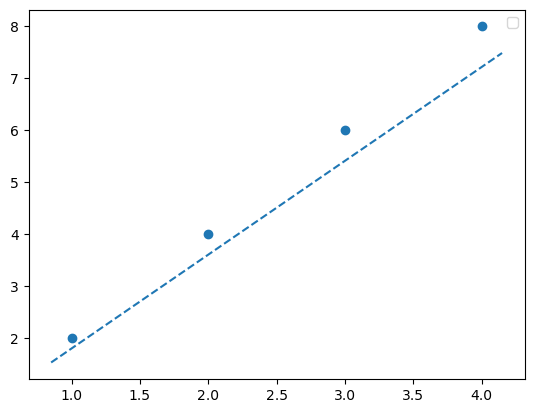

In [15]:
plt.scatter(X, Y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] * x_vals #the line equation
plt.plot(x_vals, y_vals, '--')
plt.legend()

# Linear Regression - Using SK Learn

Scikit-Learn is the mostly widely used Library for Machine Learning algorithms. It provides simple and efficient tools for data analysis. It is accessible to everybody, and reusable in various contexts. It is built on NumPy, SciPy, and Matplotlib and available as Open source, commercially usable - BSD license.

More information about SKLearn can be found here: https://scikit-learn.org/stable/

SKLearn simplifies ML coding doing all the heavy lifting and allowing us to create and predict ML models with just 4 lines of code(with pre-processed data)!

<br><b>Step1:</b> Initialize the model
<br> Ex: mymodel = LinearRegression()
<br><br><b>Step2:</b> Fit the model using train
<br> Ex: mymodel.fit(x_train, y_train)
<br><br><b>Step3:</b> Predict the test data
<br> Ex: y_pred = mymodel.predict(x_test)
<br><br><b>Step4:</b> Measure the performance
<br> Ex: accuracy_score(y_test, y_pred)



In [17]:
#Lets mockup the data

score = pd.DataFrame({'X':[1,2,3,4,5,6,7,8,9,10],'Y':[2,4,6,8,10,12,14,16,18,20]})
print(score)

y = score.pop('Y')
x = score

print(x)
print(y)

    X   Y
0   1   2
1   2   4
2   3   6
3   4   8
4   5  10
5   6  12
6   7  14
7   8  16
8   9  18
9  10  20
    X
0   1
1   2
2   3
3   4
4   5
5   6
6   7
7   8
8   9
9  10
0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
8    18
9    20
Name: Y, dtype: int64


In [18]:
#Lets import the SK-Learn Library and import the model
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()

In [19]:
#Fit the model
mymodel.fit(x,y)

LinearRegression()

In [20]:
#finding the coefficient
mymodel.coef_

array([2.])

In [21]:
#predicting the model
mymodel.predict(np.array([[6]]))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.])